# 1stop ai - task 1 - prediction of marks

## submitted by pragati gupta

### ---- importing modules and data

In [2]:
import sklearn as sns
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  

In [3]:
df = pd.read_csv("data.csv")
df

,Hours,Scores
0,5.1,57
1,6.2,70
2,3.2,35
3,8.5,90
4,3.5,42
5,1.5,20
6,9.2,92
7,5.5,60
8,0.5,10
9,0.3,5


### ---- sorting data by Hours column to see how the data varies with Scores. In our case, as the no. of hours increase , our scores increase

In [4]:
df.sort_values(by=['Hours'], inplace=True)
df

,Hours,Scores
9,0.3,5
8,0.5,10
16,1.1,17
5,1.5,20
19,1.9,24
18,2.5,27
22,2.7,30
2,3.2,35
15,3.3,40
4,3.5,42


### ---- now visualizing the above table with the help of matplotlib

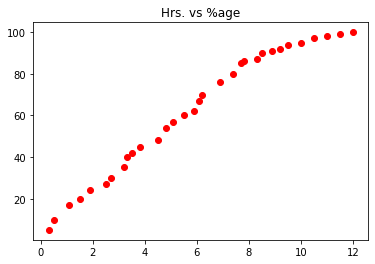

In [5]:
plt.plot(df.Hours,df.Scores,'ro')
plt.title('Hrs. vs %age')  
plt.show()

### ---- defining independent and dependent variables, x = independent , y = Scores = dependent on Hours

In [6]:
x= df.Hours.values
y= df.Scores.values
x,y

(array([ 0.3,  0.5,  1.1,  1.5,  1.9,  2.5,  2.7,  3.2,  3.3,  3.5,  3.8,
         4.5,  4.8,  5.1,  5.5,  5.9,  6.1,  6.2,  6.9,  7.4,  7.7,  7.8,
         8.3,  8.5,  8.9,  9.2,  9.5, 10. , 10.5, 11. , 11.5, 12. ]),
 array([  5,  10,  17,  20,  24,  27,  30,  35,  40,  42,  45,  48,  54,
         57,  60,  62,  67,  70,  76,  80,  85,  86,  87,  90,  91,  92,
         94,  95,  97,  98,  99, 100], dtype=int64))

### ---- defining train and tests splits

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22,), (10,), (22,), (10,))

### ---- making our model & plotting the best fit line

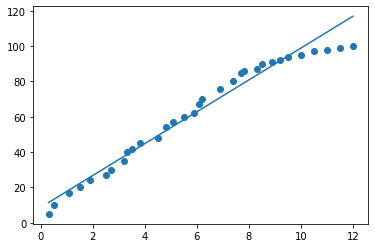

In [8]:
lr = LinearRegression()   
lr.fit(x_train.reshape(-1,1), y_train) 

bestfit_line = lr.coef_ * x + lr.intercept_

plt.scatter(x,y)
plt.plot(x,bestfit_line)
plt.show()

### ---- making predictions for the test data 

In [9]:
y_pred = lr.predict(x_test.reshape(-1,1))

df2 = pd.DataFrame({'Actual_scores (y_test)': y_test, 'Predicted_scores (y_pred)': y_pred})  

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

df2

Mean Absolute Error: 5.116077845250163


,Actual_scores (y_test),Predicted_scores (y_pred)
0,100,116.930813
1,27,31.264895
2,98,107.913348
3,24,25.854416
4,70,64.629516
5,42,40.282360
6,10,13.229965
7,40,38.478867
8,48,49.299825
9,76,70.941741


In [16]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

print("r2 score =", r2(y_test,y_pred))

print("it means ", r2(y_test,y_pred)*100 ," % of the data can be explained by the model's input.")

print("mean squared error =" , mse(y_test,y_pred))

r2 score = 0.9452070873897239
it means  94.52070873897239  % of the data can be explained by the model's input.
mean squared error = 47.836952354401554


### ---- the mean absolute error is less , so our model is go to go .
### ---- now giving user-defined data to make predictions about the scores

In [15]:
no_of_hrs=int(input())

given = np.array([no_of_hrs]).reshape(-1,1)

pred=lr.predict(given)

print("for", no_of_hrs, "hours, predicted precentage score is =" ,pred[0] , "%")

6
for 6 hours, predicted precentage score is = 62.82602297312833 %


# hence for 6 hours , our model has predicted percentage score of 62.82%